In [6]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [7]:
file_name = "Trepn_2022.04.04_183605_total.csv"
df = pd.read_csv ('Trepn_2022.04.04_183605_total.csv')
df.head(3)


,TimeMS,Time,Min,Memory Usage,CPU Frequency,CPU Load,Wi-Fi RSSI Level,Screen Bright,Battery,Download,Upload,Quality
0,27,0,00:00:00,1824244,1144000,44,-61,3,79,456,17,360
1,10002,10,00:00:10,1812244,1586000,44,-67,3,79,456,17,360
2,20043,20,00:00:20,1828204,1586000,44,-63,3,79,456,17,360


In [8]:
date_time = pd.to_datetime(df.pop('Min'), format='%H:%M:%S').dt.time


df_360 = df.query("Quality == 360")
df_720 = df.query("Quality == 720")

timestamp_360 = df_360.pop('Time')
timestamp_720 =df_720.pop('Time')
timestamp_s = df.pop('Time')

df.pop('TimeMS')
df.pop('Download')
df.pop('Upload')
df.head(3)

,Memory Usage,CPU Frequency,CPU Load,Wi-Fi RSSI Level,Screen Bright,Battery,Quality
0,1824244,1144000,44,-61,3,79,360
1,1812244,1586000,44,-67,3,79,360
2,1828204,1586000,44,-63,3,79,360


In [9]:
date_time.head(3)

0    00:00:00
1    00:00:10
2    00:00:20
Name: Min, dtype: object

In [10]:
date_time.head(20)
df.head(5)

,Memory Usage,CPU Frequency,CPU Load,Wi-Fi RSSI Level,Screen Bright,Battery,Quality
0,1824244,1144000,44,-61,3,79,360
1,1812244,1586000,44,-67,3,79,360
2,1828204,1586000,44,-63,3,79,360
3,1794804,1586000,44,-63,3,79,360
4,1816568,1586000,44,-65,3,79,360


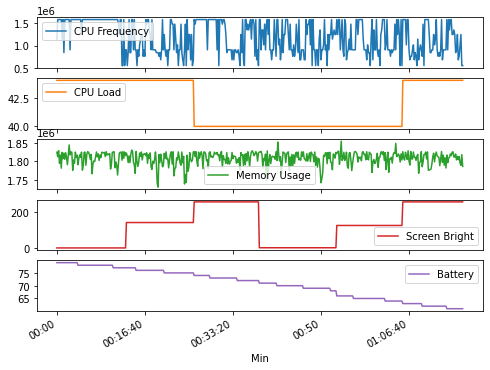

In [11]:
plot_cols = ['CPU Frequency', 'CPU Load','Memory Usage', 'Screen Bright','Battery']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)


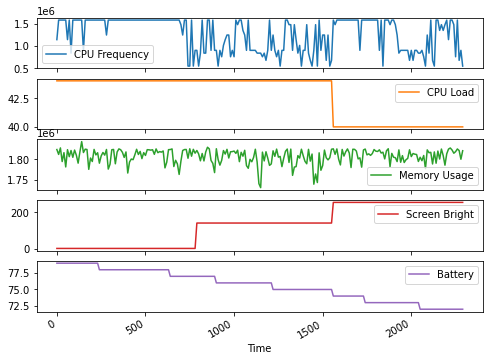

In [26]:
plot_cols = ['CPU Frequency', 'CPU Load','Memory Usage', 'Screen Bright','Battery']
plot_features = df_360[plot_cols]
plot_features.index = timestamp_360
_ = plot_features.plot(subplots=True)

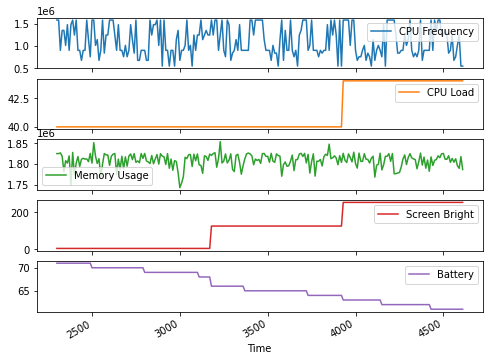

In [27]:
plot_cols = ['CPU Frequency', 'CPU Load','Memory Usage', 'Screen Bright','Battery']
plot_features = df_720[plot_cols]
plot_features.index = timestamp_720
_ = plot_features.plot(subplots=True)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Memory Usage,462.0,1.808058e+06,17408.590632,1730816.0,1798654.0,1811746.0,1821768.0,1853900.0
CPU Frequency,462.0,1.194452e+06,365650.872601,546000.0,902000.0,1248000.0,1586000.0,1586000.0
CPU Load,462.0,4.194805e+01,2.001493,40.0,40.0,40.0,44.0,44.0
Wi-Fi RSSI Level,462.0,-6.252381e+01,3.433672,-77.0,-64.0,-63.0,-60.0,-55.0
Screen Bright,462.0,1.243247e+02,103.129568,3.0,4.0,126.0,255.0,255.0
Battery,462.0,7.074675e+01,5.627900,61.0,65.0,71.0,76.0,79.0
Quality,462.0,5.407792e+02,180.193434,360.0,360.0,720.0,720.0,720.0


In [28]:
df_360.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TimeMS,230.0,1.145052e+06,665404.273109,27.0,572548.5,1145060.0,1717560.0,2290060.0
Memory Usage,230.0,1.807749e+06,18070.943099,1730816.0,1797004.0,1812638.0,1822621.0,1843640.0
CPU Frequency,230.0,1.273604e+06,373696.494297,546000.0,902000.0,1586000.0,1586000.0,1586000.0
CPU Load,230.0,4.271304e+01,1.872649,40.0,40.0,44.0,44.0,44.0
Wi-Fi RSSI Level,230.0,-6.305217e+01,3.185237,-77.0,-64.0,-63.0,-61.0,-56.0
Screen Bright,230.0,1.306130e+02,103.253674,3.0,3.0,142.0,255.0,255.0
Battery,230.0,7.563043e+01,2.246382,72.0,74.0,76.0,78.0,79.0
Download,230.0,4.365826e+02,330.324043,28.0,28.0,456.0,841.0,841.0
Upload,230.0,1.070435e+01,5.845872,3.0,3.0,12.0,17.0,17.0
Quality,230.0,3.600000e+02,0.000000,360.0,360.0,360.0,360.0,360.0


In [29]:
df_720.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TimeMS,232.0,3.455060e+06,671168.135914,2300060.0,2877560.0,3455060.0,4032560.0,4610060.0
Memory Usage,232.0,1.808364e+06,16759.621590,1742516.0,1800147.0,1811322.0,1820631.0,1853900.0
CPU Frequency,232.0,1.115983e+06,340529.432023,546000.0,902000.0,1014000.0,1482000.0,1586000.0
CPU Load,232.0,4.118966e+01,1.832434,40.0,40.0,40.0,44.0,44.0
Wi-Fi RSSI Level,232.0,-6.200000e+01,3.594127,-73.0,-64.0,-63.0,-59.0,-55.0
Screen Bright,232.0,1.180905e+02,102.849175,4.0,4.0,126.0,255.0,255.0
Battery,232.0,6.590517e+01,3.304145,61.0,63.0,65.0,69.0,71.0
Download,232.0,8.680905e+02,67.828888,820.0,820.0,823.0,966.0,966.0
Upload,232.0,9.461207e+00,1.268416,8.0,8.0,9.0,11.0,11.0
Quality,232.0,7.200000e+02,0.000000,720.0,720.0,720.0,720.0,720.0


In [13]:
#timestamp_s = date_time.map(pd.Timestamp.timestamp)


#timestamp_s = lambda data: datetime.datetime.strptime(date_time, '%H:%M:%S').timestamp()

print(timestamp_s)

0         0
1        10
2        20
3        30
4        40
       ... 
457    4570
458    4580
459    4590
460    4600
461    4610
Name: Time, Length: 462, dtype: int64


In [14]:


#minute = 60
#hour = 60*60

#df['Min sin'] = np.sin(timestamp_s * (2 * np.pi / minute))
#df['Min cos'] = np.cos(timestamp_s * (2 * np.pi / minute))
#df['Hour sin'] = np.sin(timestamp_s * (2 * np.pi / hour))
#df['Hour cos'] = np.cos(timestamp_s * (2 * np.pi / hour))



In [19]:
column_indices = {name: i for i, name in enumerate(df.columns)}



n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

print(column_indices)

{'Memory Usage': 0, 'CPU Frequency': 1, 'CPU Load': 2, 'Wi-Fi RSSI Level': 3, 'Screen Bright': 4, 'Battery': 5, 'Quality': 6}


In [20]:
#plt.plot(np.array(df['Min sin'])[:25])
#plt.plot(np.array(df['Min cos'])[:25])
#plt.xlabel('Time [h]')
#plt.title('Time of day signal')

In [22]:
#df.pop('Min sin')
#df.pop('Min cos')
#df.pop('Hour cos')
#df.pop('Hour cos')



In [23]:
fft = tf.signal.rfft(df['Battery'])


In [24]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
print(column_indices)

{'Memory Usage': 0, 'CPU Frequency': 1, 'CPU Load': 2, 'Wi-Fi RSSI Level': 3, 'Screen Bright': 4, 'Battery': 5, 'Quality': 6}


In [25]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

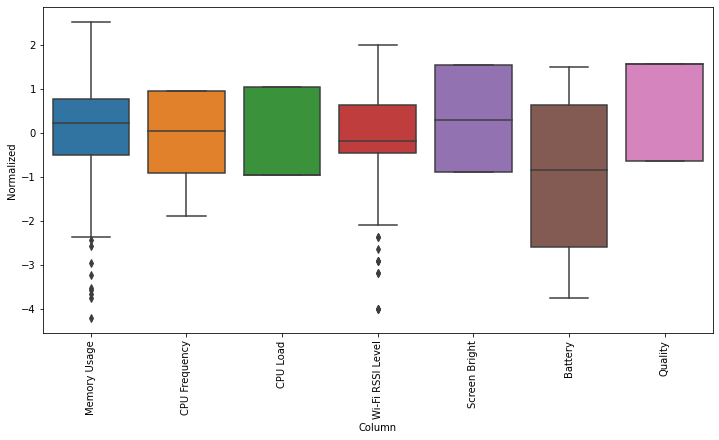

In [30]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [69]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [70]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Battery'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Battery']

In [71]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['Battery'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Battery']

In [72]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [73]:
w2.total_window_size

7

In [74]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 11)
Inputs shape: (3, 6, 11)
Labels shape: (3, 1, 1)


In [75]:
w2.example = example_inputs, example_labels

In [76]:
def plot(self, model=None, plot_col='Battery', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time')

WindowGenerator.plot = plot

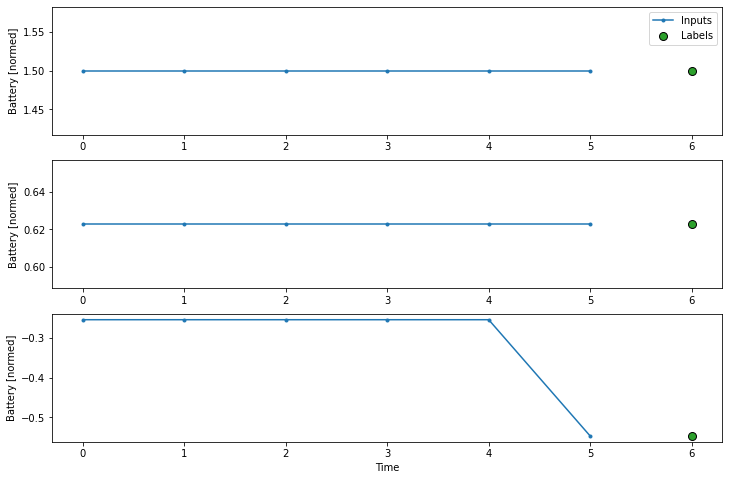

In [77]:
w2.plot()

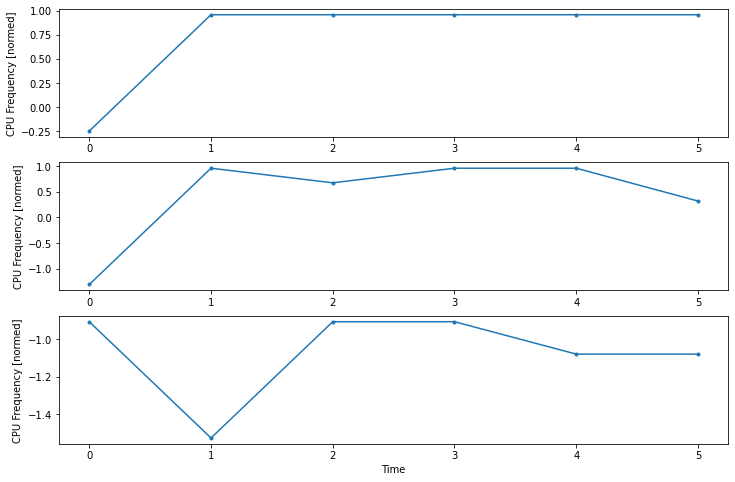

In [78]:
w2.plot(plot_col='CPU Frequency')

In [79]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [80]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [81]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 11), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [82]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 11)
Labels shape (batch, time, features): (32, 1, 1)


In [83]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Battery'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Battery']

In [84]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 11)
Labels shape (batch, time, features): (32, 1, 1)


In [85]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [86]:
baseline = Baseline(label_index=column_indices['Battery'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_absolute_error: 0.0096


In [87]:
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=2,
    label_columns=['Battery'])

wide_window

Total window size: 32
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31]
Label column name(s): ['Battery']

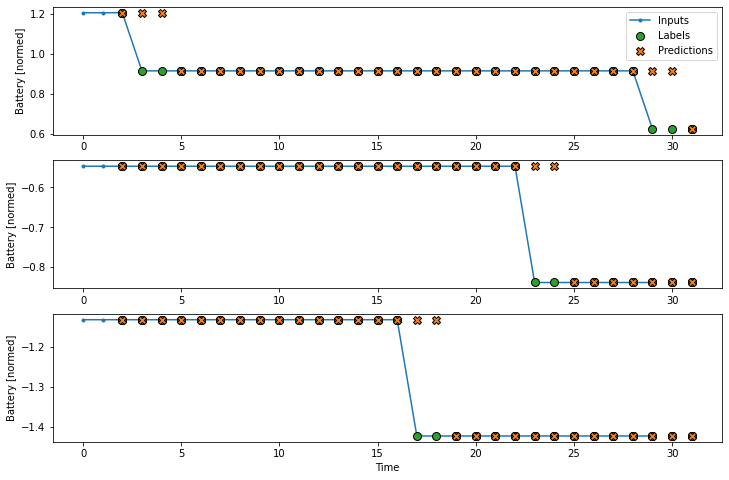

In [88]:
wide_window.plot(baseline)

In [89]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [90]:
print(linear._get_trainable_state())

In [91]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 11)
Output shape: (32, 1, 1)


In [92]:
linear.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (32, 1, 1)                12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [93]:
MAX_EPOCHS = 200

def compile_and_fit(model, window, patience=20):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [94]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/200
11/11 [==============================] - 1s 18ms/step - loss: 2.3631 - mean_absolute_error: 1.3528 - val_loss: 5.2437 - val_mean_absolute_error: 2.1321
Epoch 2/200
11/11 [==============================] - 0s 6ms/step - loss: 2.1751 - mean_absolute_error: 1.2953 - val_loss: 4.8656 - val_mean_absolute_error: 2.0531
Epoch 3/200
11/11 [==============================] - 0s 6ms/step - loss: 1.9990 - mean_absolute_error: 1.2405 - val_loss: 4.5167 - val_mean_absolute_error: 1.9773
Epoch 4/200
11/11 [==============================] - 0s 6ms/step - loss: 1.8355 - mean_absolute_error: 1.1865 - val_loss: 4.1968 - val_mean_absolute_error: 1.9052
Epoch 5/200
11/11 [==============================] - 0s 7ms/step - loss: 1.6841 - mean_absolute_error: 1.1335 - val_loss: 3.8800 - val_mean_absolute_error: 1.8308
Epoch 6/200
11/11 [==============================] - 0s 6ms/step - loss: 1.5385 - mean_absolute_error: 1.0809 - val_loss: 3.5831 - val_mean_absolute_error: 1.7584
Epoch 7/200
11/11 [==

11/11 [==============================] - 0s 6ms/step - loss: 0.0348 - mean_absolute_error: 0.1469 - val_loss: 0.1940 - val_mean_absolute_error: 0.3812
Epoch 52/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0332 - mean_absolute_error: 0.1433 - val_loss: 0.1906 - val_mean_absolute_error: 0.3776
Epoch 53/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.1396 - val_loss: 0.1863 - val_mean_absolute_error: 0.3728
Epoch 54/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0302 - mean_absolute_error: 0.1361 - val_loss: 0.1826 - val_mean_absolute_error: 0.3685
Epoch 55/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0289 - mean_absolute_error: 0.1327 - val_loss: 0.1794 - val_mean_absolute_error: 0.3650
Epoch 56/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0278 - mean_absolute_error: 0.1297 - val_loss: 0.1770 - val_mean_absolute_error: 0.3625
Epoch 57/200
11/11 [=========

11/11 [==============================] - 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0779 - val_loss: 0.1460 - val_mean_absolute_error: 0.3158
Epoch 102/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0775 - val_loss: 0.1460 - val_mean_absolute_error: 0.3160
Epoch 103/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0772 - val_loss: 0.1460 - val_mean_absolute_error: 0.3154
Epoch 104/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0769 - val_loss: 0.1460 - val_mean_absolute_error: 0.3147
Epoch 105/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0766 - val_loss: 0.1457 - val_mean_absolute_error: 0.3137
Epoch 106/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0764 - val_loss: 0.1456 - val_mean_absolute_error: 0.3134
Epoch 107/200
11/11 [===

In [95]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 30, 11)
Output shape: (32, 30, 1)


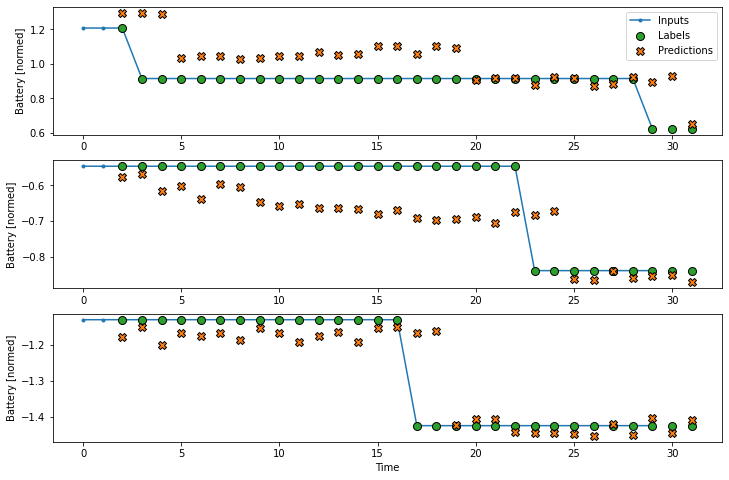

In [96]:
wide_window.plot(linear)

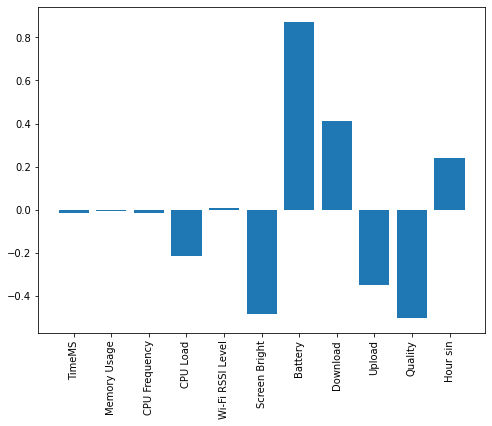

In [97]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [98]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/200
11/11 [==============================] - 1s 23ms/step - loss: 0.4577 - mean_absolute_error: 0.5336 - val_loss: 5.0582 - val_mean_absolute_error: 2.1804
Epoch 2/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0810 - mean_absolute_error: 0.2079 - val_loss: 3.1424 - val_mean_absolute_error: 1.6772
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0664 - mean_absolute_error: 0.1974 - val_loss: 2.7915 - val_mean_absolute_error: 1.5777
Epoch 4/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0407 - mean_absolute_error: 0.1427 - val_loss: 2.9008 - val_mean_absolute_error: 1.6181
Epoch 5/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0351 - mean_absolute_error: 0.1258 - val_loss: 2.6573 - val_mean_absolute_error: 1.5468
Epoch 6/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0282 - mean_absolute_error: 0.1140 - val_loss: 2.2896 - val_mean_absolute_error: 1.4234
Epoch 7/200
11/11 [==

11/11 [==============================] - 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0372 - val_loss: 0.3857 - val_mean_absolute_error: 0.5161
Epoch 52/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0490 - val_loss: 0.4461 - val_mean_absolute_error: 0.5709
Epoch 53/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0435 - val_loss: 0.4012 - val_mean_absolute_error: 0.5335
Epoch 54/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0391 - val_loss: 0.3978 - val_mean_absolute_error: 0.5280
Epoch 55/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0366 - val_loss: 0.4095 - val_mean_absolute_error: 0.5396
Epoch 56/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0336 - val_loss: 0.3991 - val_mean_absolute_error: 0.5289
Epoch 57/200
11/11 [=========

In [99]:
CONV_WIDTH = 30
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Battery'])

conv_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30]
Label column name(s): ['Battery']

Text(0.5, 1.0, 'Battery consuption prediction')

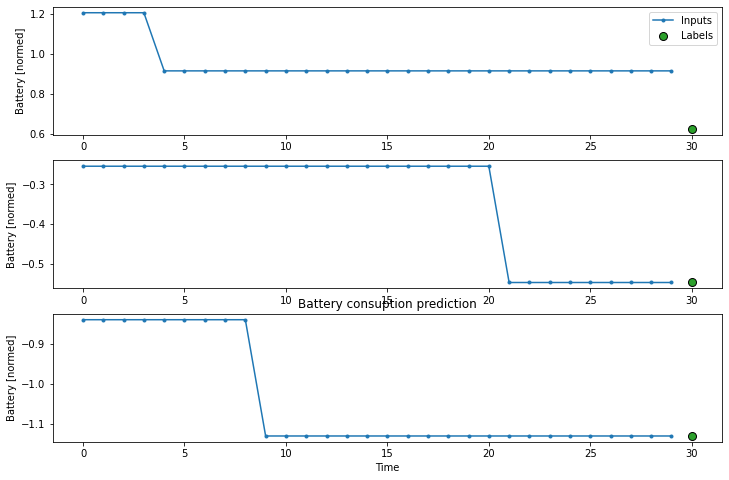

In [102]:
conv_window.plot()
plt.title("Battery consuption prediction")

In [103]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [104]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 30, 11)
Output shape: (32, 1, 1)


In [105]:
history = compile_and_fit(multi_step_dense, conv_window)
IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

2/2 [==============================] - 0s 3ms/step - loss: 1.3788 - mean_absolute_error: 1.1472


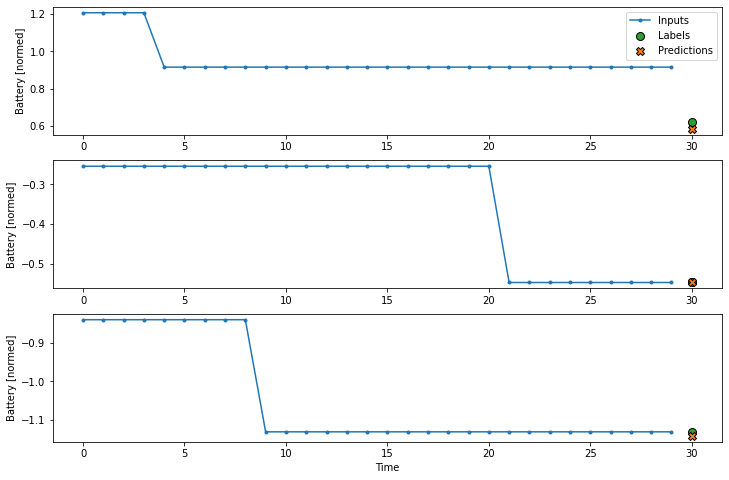

In [106]:
conv_window.plot(multi_step_dense)

In [107]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 30, 11)
Output shape: (32, 1, 1)


In [108]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [109]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 30, 11)
Output shape: (32, 1, 1)


In [110]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

2/2 [==============================] - 0s 3ms/step - loss: 1.0489 - mean_absolute_error: 0.9755


In [111]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 30, 11)
Labels shape: (32, 30, 1)
Output shape: (32, 1, 1)


In [112]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Battery'])

wide_conv_window

Total window size: 54
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
Label indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53]
Label column name(s): ['Battery']

In [113]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 53, 11)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


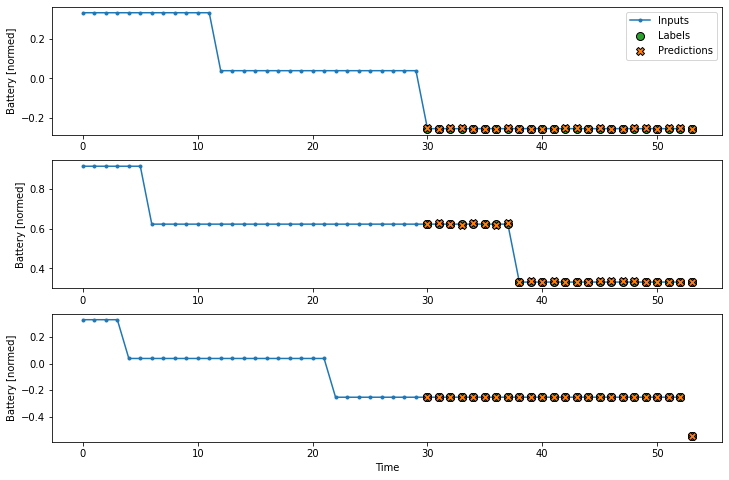

In [114]:
wide_conv_window.plot(conv_model)

In [115]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [116]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 30, 11)
Output shape: (32, 30, 1)


In [117]:
history = compile_and_fit(lstm_model, wide_window)
#lstm_model.save('lstm_model.pt')
IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 6ms/step - loss: 0.1932 - mean_absolute_error: 0.3091


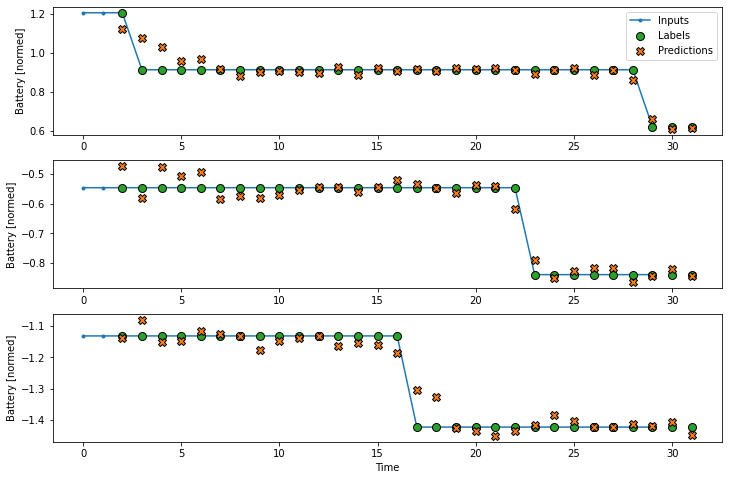

In [118]:
wide_window.plot(lstm_model)

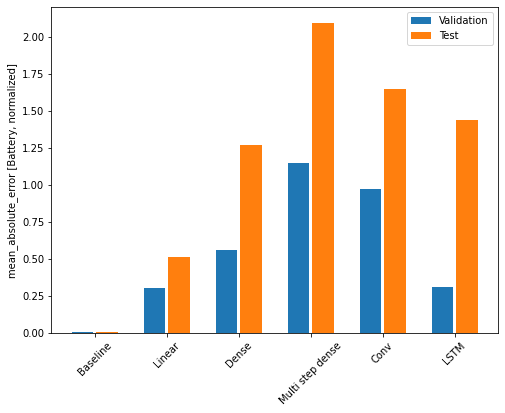

In [119]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Battery, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [120]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0064
Linear      : 0.5157
Dense       : 1.2719
Multi step dense: 2.0940
Conv        : 1.6439
LSTM        : 1.4380


In [121]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 11)
Labels shape (batch, time, features): (32, 24, 11)


In [122]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [123]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

3/3 [==============================] - 0s 2ms/step - loss: 0.3703 - mean_absolute_error: 0.2430


In [124]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [125]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 2ms/step - loss: 0.6361 - mean_absolute_error: 0.5439


In [126]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

3/3 [==============================] - 0s 4ms/step - loss: 0.7585 - mean_absolute_error: 0.6576

CPU times: user 44.1 s, sys: 10.7 s, total: 54.8 s
Wall time: 25.6 s


In [127]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [128]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

3/3 [==============================] - 0s 4ms/step - loss: 0.3245 - mean_absolute_error: 0.2683

CPU times: user 16.9 s, sys: 3.62 s, total: 20.5 s
Wall time: 10.6 s


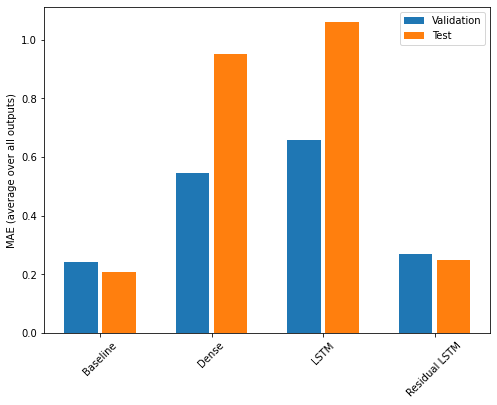

In [129]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [130]:
print(val_performance)

{'Baseline': [0.3702838122844696, 0.24296946823596954], 'Dense': [0.6360901594161987, 0.5438636541366577], 'LSTM': [0.758481502532959, 0.6576355695724487], 'Residual LSTM': [0.32445642352104187, 0.26828819513320923]}


In [131]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.2082
Dense          : 0.9530
LSTM           : 1.0596
Residual LSTM  : 0.2473


Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

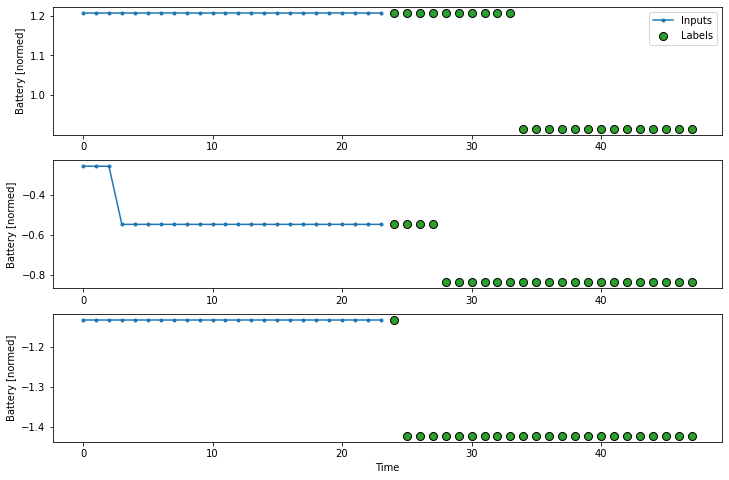

In [132]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

2/2 [==============================] - 0s 3ms/step - loss: 0.5435 - mean_absolute_error: 0.3929


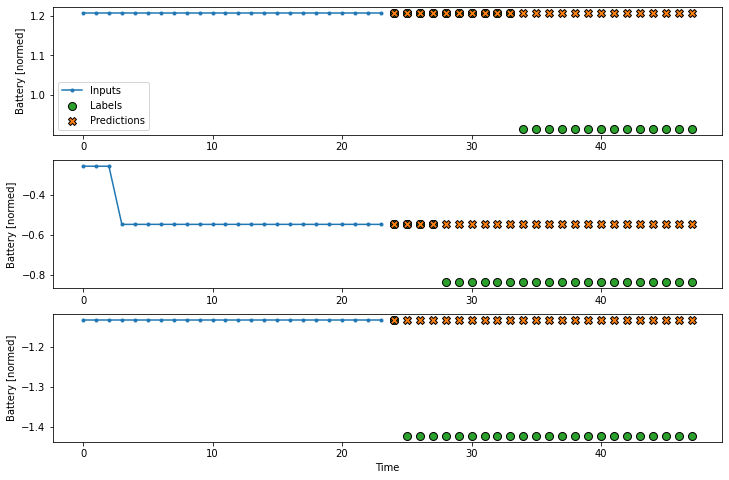

In [133]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

In [134]:
print(multi_performance)

{'Last': []}


2/2 [==============================] - 0s 3ms/step - loss: 0.5174 - mean_absolute_error: 0.4125


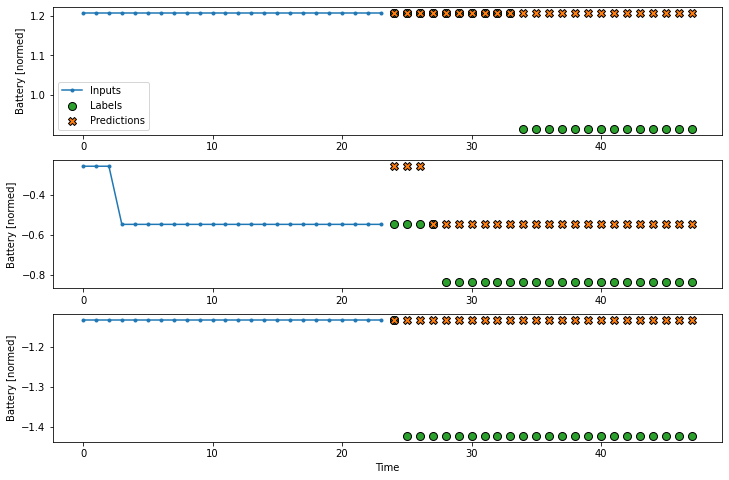

In [135]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

In [136]:
print(multi_val_performance)

{'Last': [0.5435203313827515, 0.3928978145122528], 'Repeat': [0.5174239277839661, 0.41247856616973877]}


2/2 [==============================] - 0s 2ms/step - loss: 1.0982 - mean_absolute_error: 0.7821


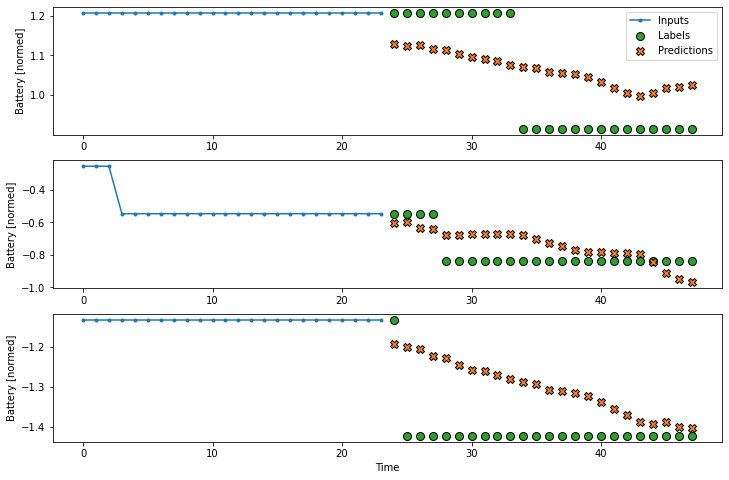

In [137]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

In [138]:
print(multi_val_performance)

{'Last': [0.5435203313827515, 0.3928978145122528], 'Repeat': [0.5174239277839661, 0.41247856616973877], 'Linear': [1.0982314348220825, 0.7821375131607056]}


2/2 [==============================] - 0s 3ms/step - loss: 0.9257 - mean_absolute_error: 0.7905


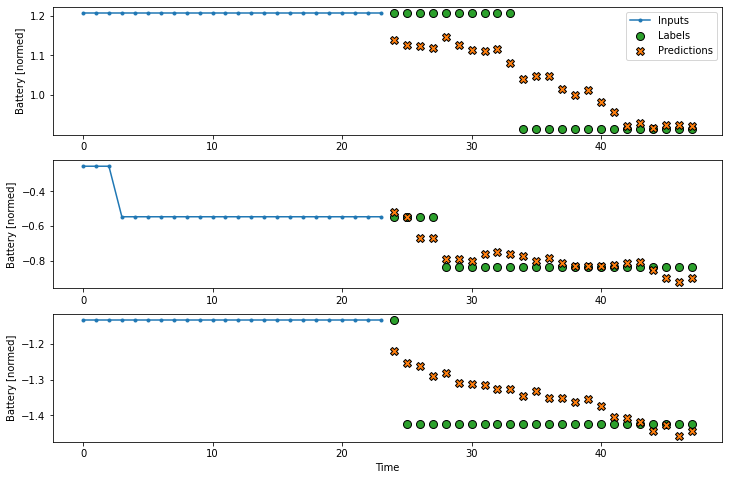

In [139]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

2/2 [==============================] - 0s 3ms/step - loss: 0.9986 - mean_absolute_error: 0.8344


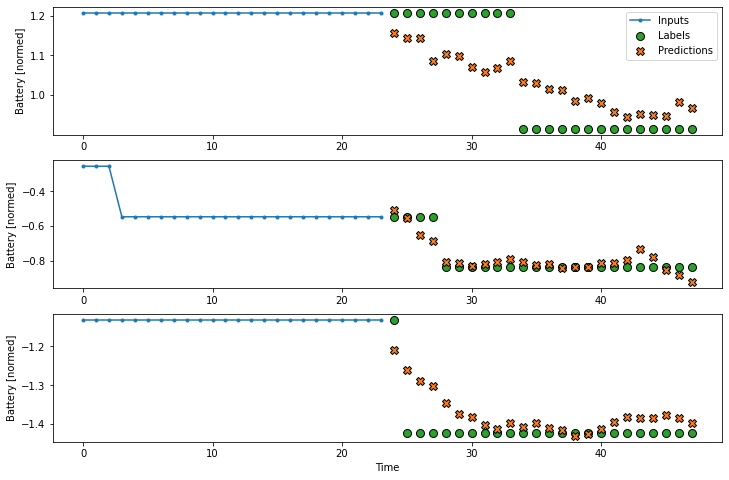

In [140]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

2/2 [==============================] - 0s 4ms/step - loss: 1.2303 - mean_absolute_error: 0.8956


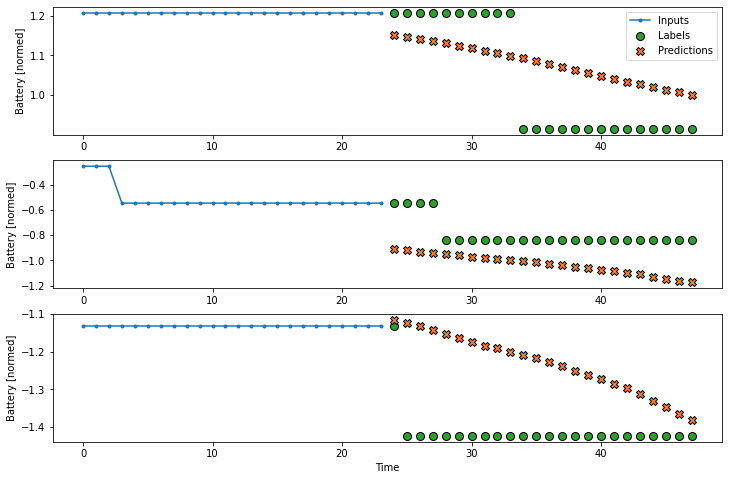

In [141]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [142]:
multi_val_performance.values()

dict_values([[0.5435203313827515, 0.3928978145122528], [0.5174239277839661, 0.41247856616973877], [1.0982314348220825, 0.7821375131607056], [0.9257324934005737, 0.7904859781265259], [0.9986420273780823, 0.8343698382377625], [1.2303495407104492, 0.895587682723999]])

In [143]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [91]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [92]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [93]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 11])

In [94]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [95]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 11)


2/2 [==============================] - 0s 6ms/step - loss: 1.5361 - mean_absolute_error: 1.0310


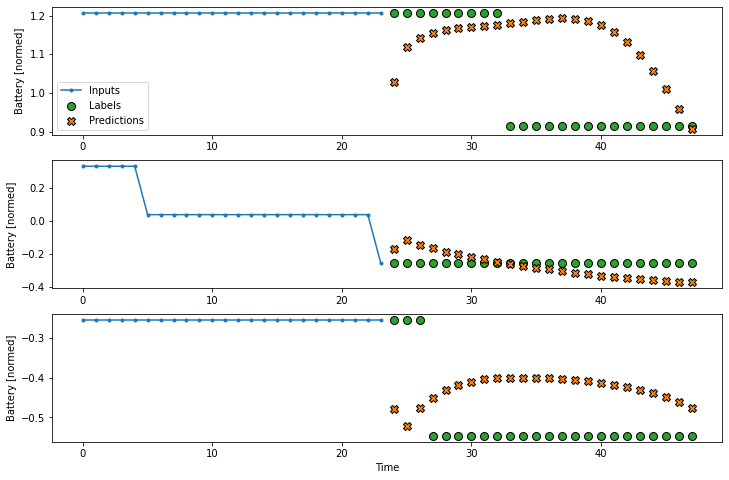

In [96]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

In [97]:
print(multi_val_performance.values())

dict_values([[0.9006733298301697, 0.5744138360023499], [0.5094403624534607, 0.3889528512954712], [0.924615204334259, 0.736518383026123], [0.7461052536964417, 0.6405026912689209], [0.8146426677703857, 0.6805188059806824], [1.359437346458435, 0.9832821488380432], [1.5361379384994507, 1.0309590101242065]])


dict_values([[], [], [], [], [], [], []])


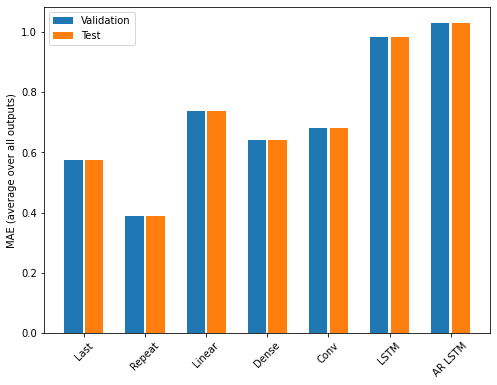

In [98]:

x = np.arange(len(multi_performance))
width = 0.3
print(multi_performance.values())
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[1] for v in multi_val_performance.values()]
test_mae = [v[1] for v in multi_val_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()



In [99]:
for name, value in multi_val_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.5744
Repeat  : 0.3890
Linear  : 0.7365
Dense   : 0.6405
Conv    : 0.6805
LSTM    : 0.9833
AR LSTM : 1.0310
